<a href="https://colab.research.google.com/github/imtufail/EVS-For-Paper/blob/main/Anomaly_Detection_for_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Shape: (115298, 10)

✅ Column Names:
 ['time', 'shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'State', 'Attack', 'Attack-Group', 'Label', 'interface']

✅ Data Types:
 time              object
shunt_voltage      int64
bus_voltage_V    float64
current_mA         int64
power_mW           int64
State             object
Attack            object
Attack-Group      object
Label             object
interface         object
dtype: object

✅ First 5 Rows:
                time  shunt_voltage  bus_voltage_V  current_mA  power_mW State  \
0  12/25/2023 22:35            978          5.165        1027      5300  idle   
1  12/25/2023 22:35            872          5.161        1009      4980  idle   
2  12/25/2023 22:35           1017          5.165        1029      5300  idle   
3  12/25/2023 22:35            930          5.161        1005      5180  idle   
4  12/25/2023 22:35            958          5.165        1034      5180  idle   

      Attack Attack-Group   Label interfa

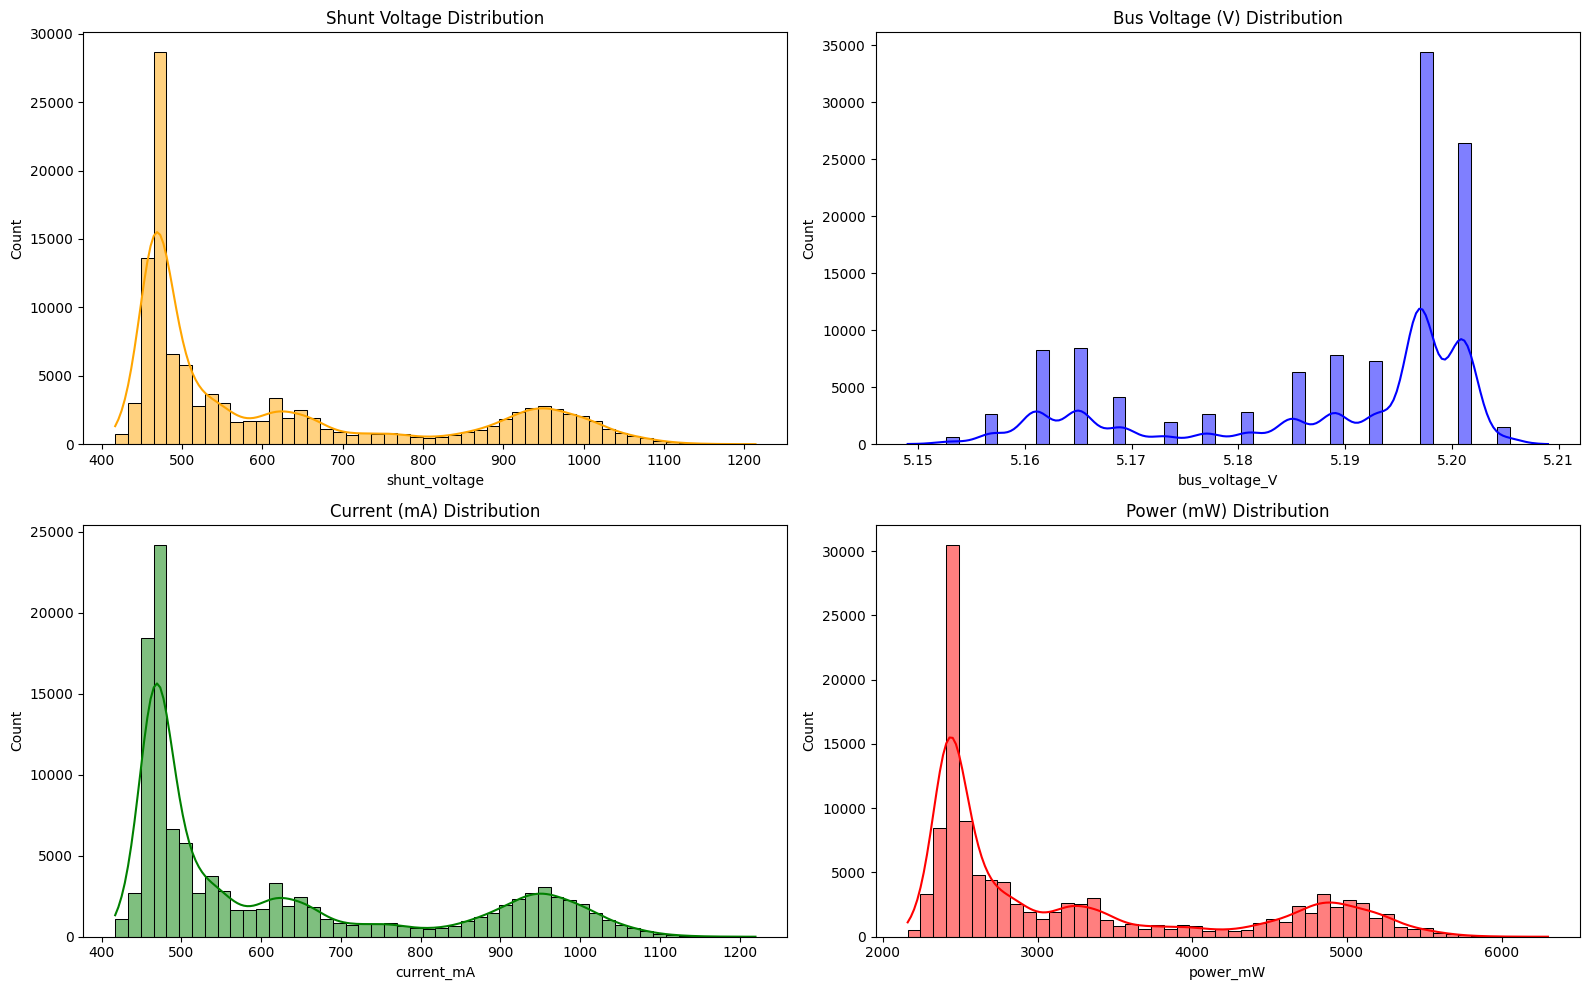


⏱️ Most Common Time Gaps (Sampling Interval Estimates):
 time
0 days 00:00:00    113303
0 days 00:01:00      1987
0 days 11:10:00         1
0 days 03:24:00         1
0 days 09:26:00         1
Name: count, dtype: int64


In [1]:
# Step 1: Dataset Overview — Exploration & Understanding

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/EVSE-B-PowerCombined.csv"  # Update path if needed
df = pd.read_csv(file_path)

# 1. Basic Structure
print("✅ Dataset Shape:", df.shape)
print("\n✅ Column Names:\n", df.columns.tolist())
print("\n✅ Data Types:\n", df.dtypes)
print("\n✅ First 5 Rows:\n", df.head())

# 2. Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# 3. Check missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# 4. Class distribution
print("\n🎯 Label Distribution:\n", df['Label'].value_counts())
print("\n🎯 Attack Group Distribution:\n", df['Attack-Group'].value_counts())

# 5. Statistical summary of numeric columns
print("\n📊 Statistical Summary:\n", df.describe())

# 6. Plot distributions of key signals
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['shunt_voltage'], bins=50, kde=True, color='orange')
plt.title("Shunt Voltage Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df['bus_voltage_V'], bins=50, kde=True, color='blue')
plt.title("Bus Voltage (V) Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df['current_mA'], bins=50, kde=True, color='green')
plt.title("Current (mA) Distribution")

plt.subplot(2, 2, 4)
sns.histplot(df['power_mW'], bins=50, kde=True, color='red')
plt.title("Power (mW) Distribution")

plt.tight_layout()
plt.show()

# 7. Check sampling intervals
time_diff = df['time'].sort_values().diff().value_counts().head()
print("\n⏱️ Most Common Time Gaps (Sampling Interval Estimates):\n", time_diff)
